In [1]:
import numpy as np 
import pandas as pd 
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

#import prophet
from fbprophet import Prophet

# For time stamps
from datetime import datetime
import pytz


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [ ]:
#shows expanded info for stock name
print(AAPL.describe())
AAPL.info()

             High         Low        Open       Close        Volume   Adj Close
count  505.000000  505.000000  505.000000  505.000000  5.050000e+02  505.000000
mean   250.220852  244.526693  247.161327  247.609841  3.487291e+07  245.114241
std     74.449947   72.440310   73.336177   73.720699  1.599440e+07   74.705492
min    145.720001  142.000000  143.979996  142.190002  1.136200e+07  139.125412
25%    199.259995  194.039993  196.449997  197.000000  2.399940e+07  194.326248
50%    223.750000  219.339996  221.850006  222.190002  3.103520e+07  217.739609
75%    293.690002  285.799988  287.380005  289.799988  4.102530e+07  287.923645
max    515.140015  500.329987  514.789978  506.089996  1.067212e+08  506.089996
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2018-08-27 to 2020-08-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          505 non-null    float64
 1   Low           505 non-n

Text(0.5, 1.0, 'AAPL')

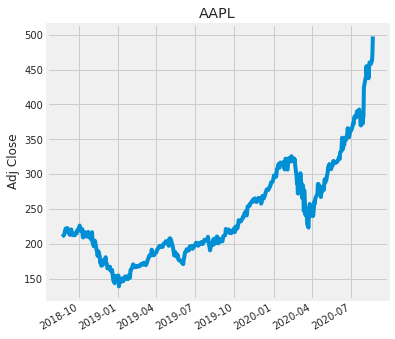

In [ ]:
# Historical view of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
company['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"{tech_list[1 - 1]}")

Text(0.5, 1.0, 'AAPL')

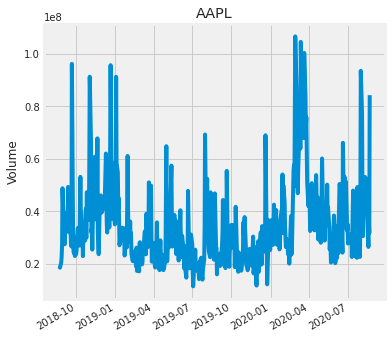

In [ ]:
# total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"{tech_list[1 - 1]}")

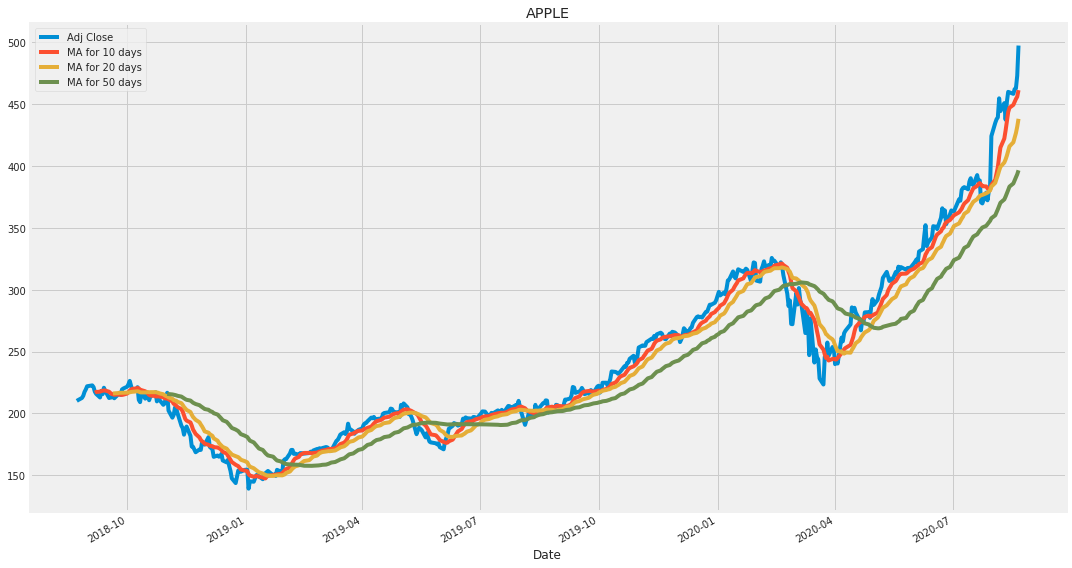

In [ ]:
ma_day = [10, 20, 50]
#create moving average for 10,20,50 days and graph

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('APPLE')


fig.tight_layout()

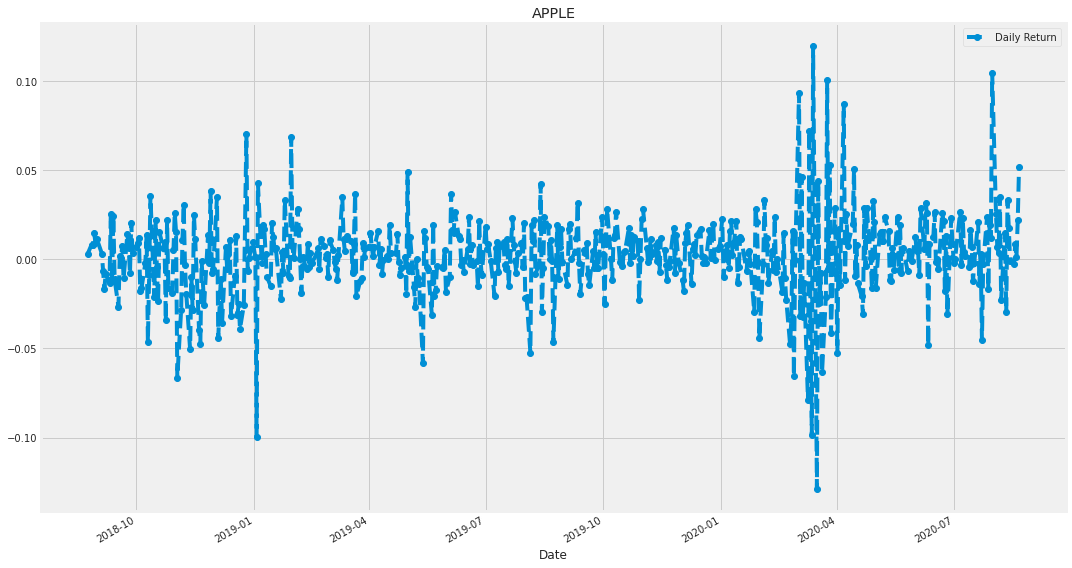

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('APPLE')

fig.tight_layout()

#LSTM Model

In [ ]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-08-17,464.350006,455.850006,464.250000,458.429993,29890400.0,458.429993
2020-08-18,464.000000,456.029999,457.410004,462.250000,26408400.0,462.250000
2020-08-19,468.649994,462.440002,463.929993,462.829987,36384500.0,462.829987


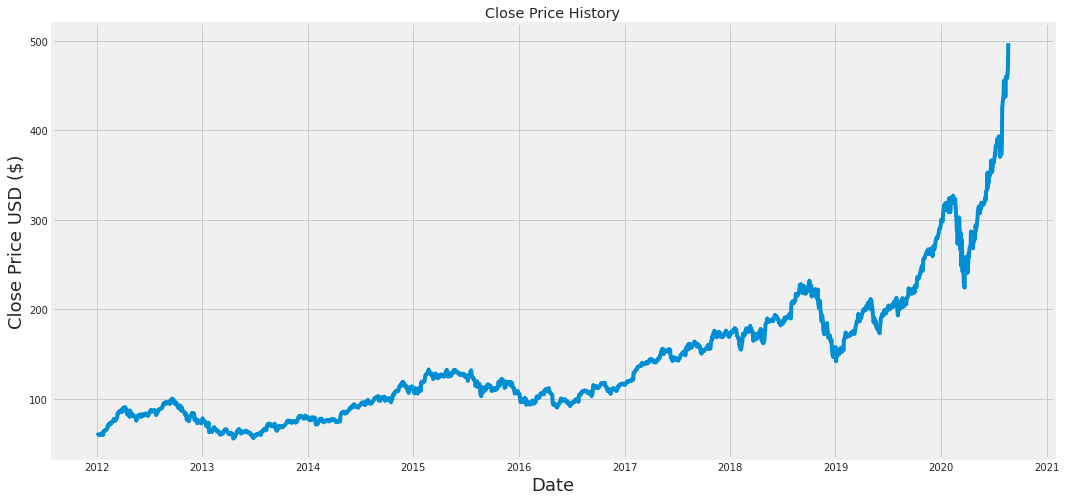

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))


In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=3, epochs=5)

Epoch 1/5
560/560 [==============================] - 16s 28ms/step - loss: 3.6274e-04
Epoch 2/5
560/560 [==============================] - 15s 28ms/step - loss: 1.8933e-04
Epoch 3/5
560/560 [==============================] - 16s 28ms/step - loss: 1.2629e-04
Epoch 4/5
560/560 [==============================] - 16s 28ms/step - loss: 1.1399e-04
Epoch 5/5
560/560 [==============================] - 16s 28ms/step - loss: 1.2276e-04


In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


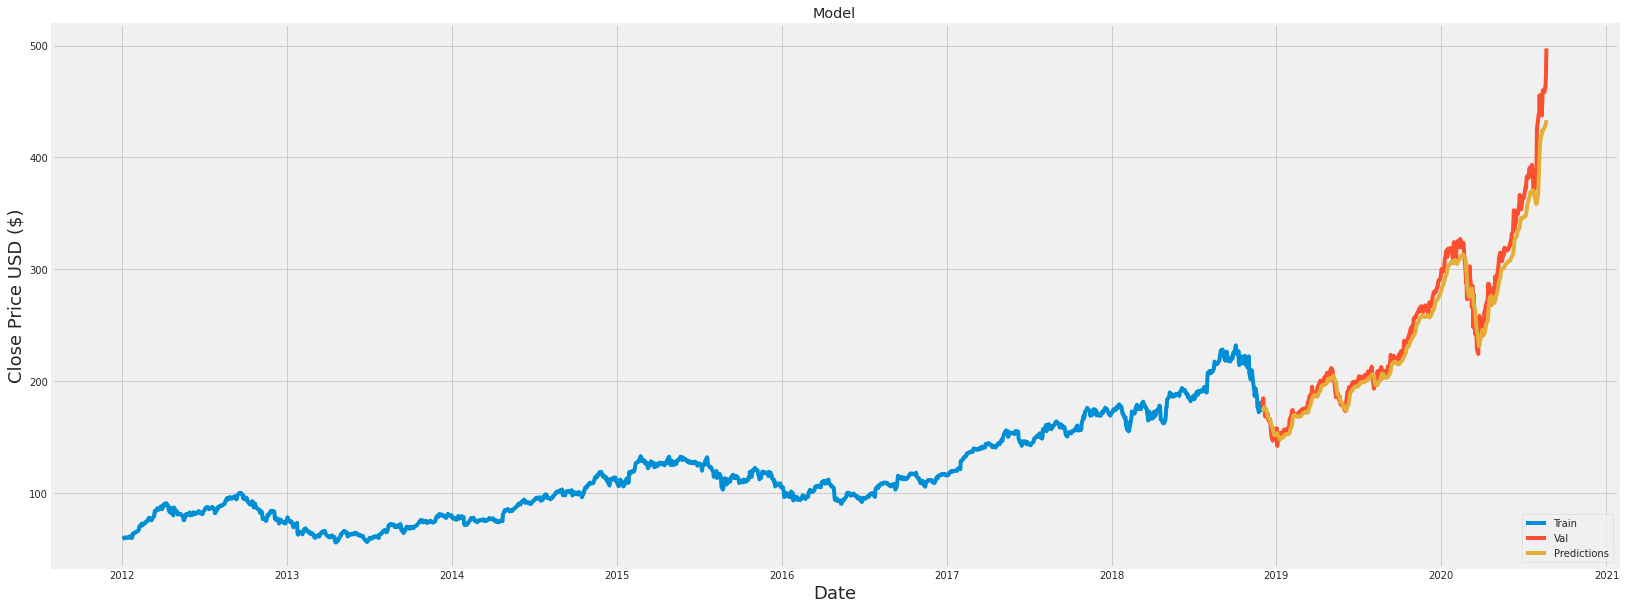

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
print(valid)

                 Close  Predictions
Date                               
2018-11-30  178.580002   190.194626
2018-12-03  184.820007   189.740402
2018-12-04  176.690002   190.137329
2018-12-06  174.720001   190.173950
2018-12-07  168.490005   189.817688
...                ...          ...
2020-08-17  458.429993   472.245483
2020-08-18  462.250000   475.342896
2020-08-19  462.829987   478.176514
2020-08-20  473.100006   480.637909
2020-08-21  497.480011   483.654785

[434 rows x 2 columns]


#Prophet Model

In [ ]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2020-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.292145
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.392120
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,297.745880
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.345581
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,301.112640
...,...,...,...,...,...,...
2020-08-19,468.649994,462.440002,463.929993,462.829987,36384500.0,462.829987
2020-08-20,473.570007,462.929993,463.000000,473.100006,31726800.0,473.100006
2020-08-21,499.470001,477.000000,477.049988,497.480011,84513700.0,497.480011


In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data['Date']=data.index.values
m = Prophet()
ph_df = data
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
m.fit(ph_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


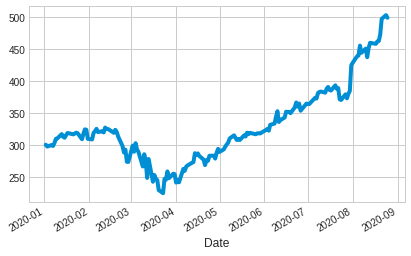

In [ ]:
ph_df['y'].plot()

In [ ]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=30)
split_date = datetime.now()
future_prices=future_prices.loc[future_prices['ds'] >= split_date]
future_prices=future_prices.reset_index()
future_prices=future_prices.drop(['index'],axis=1)
# Predict Prices
future_prices = m.predict(future_prices)
future_prices.rename(columns={'yhat': 'Close', 'ds': 'Date'}, inplace=True)
future_prices=future_prices.set_index(keys='Date')
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

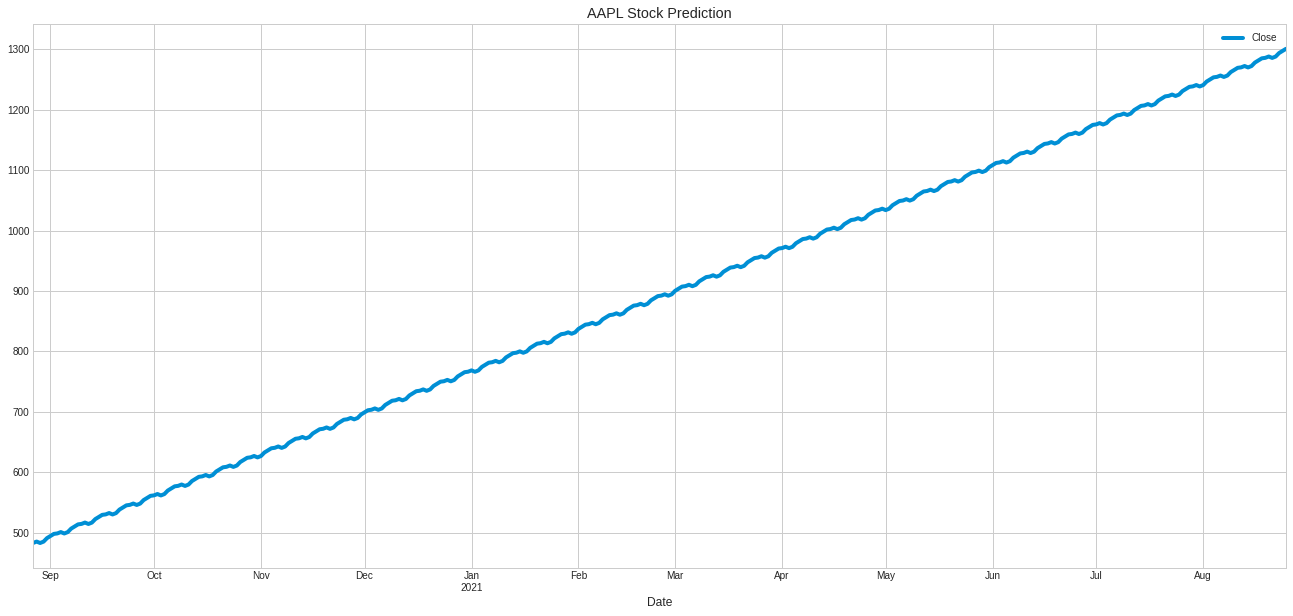

In [ ]:
future_prices['Close'].plot(figsize = (20,10), legend=True,title="AAPL Stock Prediction")

#ARIMA Model


In [2]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2020-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.292145
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.392120
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,297.745880
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.345581
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,301.112640
...,...,...,...,...,...,...
2020-08-21,499.470001,477.000000,477.049988,497.480011,84513700.0,497.480011
2020-08-24,515.140015,495.750000,514.789978,503.429993,86484400.0,503.429993
2020-08-25,500.720001,492.209991,498.790009,499.299988,52873900.0,499.299988


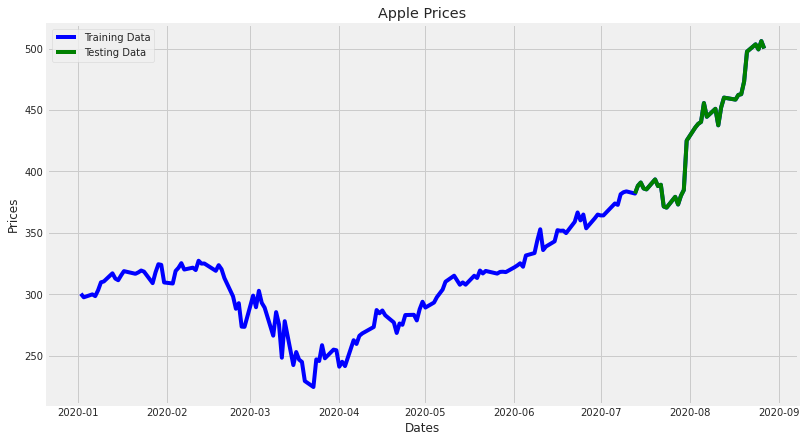

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [41]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 133.706
Symmetric mean absolute percentage error: 11.359


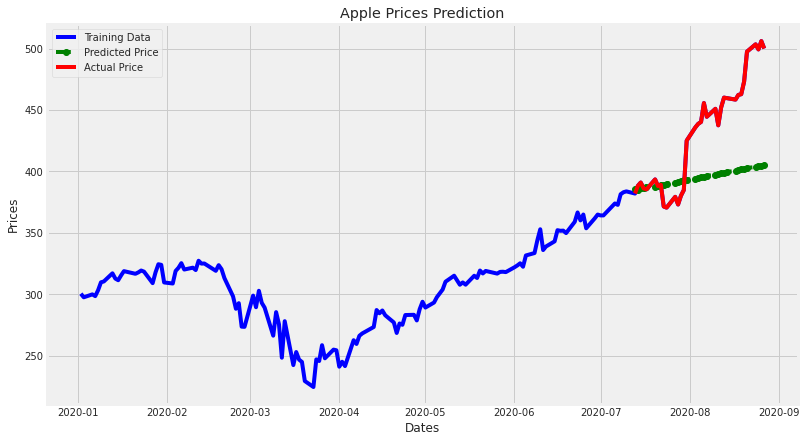

In [40]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

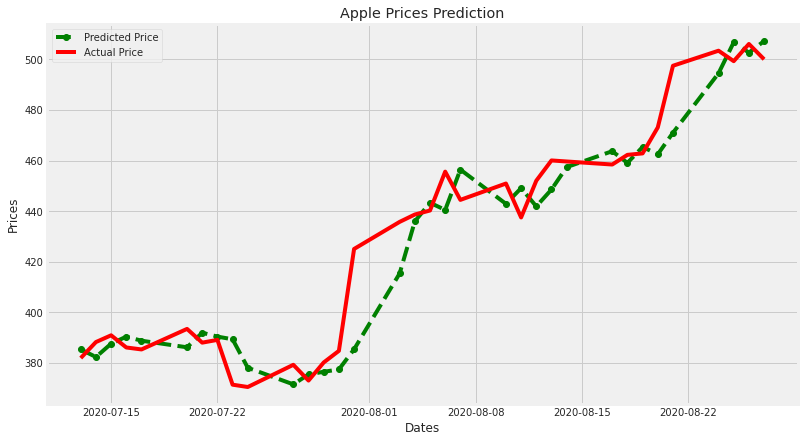

In [37]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()